In [121]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [122]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [123]:
import gzip
import pickle

X,y = pickle.load(gzip.open('flatland_train.data','rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0
#X = X / 255. su DNN

In [69]:
#model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3), input_shape=[50, 50, 1]))
#model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.2))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.25))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, (3, 3), input_shape=[50, 50, 1]))
#model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.5))
#model.add(Activation("relu"))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.1))
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(5, activation='softmax'))

#model.compile(loss="sparse_categorical_crossentropy",
#              optimizer=keras.optimizers.Adam(),
#              metrics=["accuracy"])
#model.summary()

In [124]:
X = np.repeat(X, 3, axis=3)
X.shape

(10000, 50, 50, 3)

In [149]:

vgg = vgg = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))


inputs = keras.layers.Input(shape=(50, 50, 3))
embedding = vgg(inputs)
output = keras.layers.Flatten()(embedding)
#output = keras.layers.BatchNormalization(axis=-1)(output)
output = keras.layers.Dense(64, activation='relu')(output)
output = keras.layers.Dropout(0.2)(output)
output = keras.layers.Dense(5, activation='softmax')(output)

model = keras.models.Model(inputs=inputs, outputs=output)
model.summary()

model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_103 (InputLayer)       [(None, 50, 50, 3)]       0         
_________________________________________________________________
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_37 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 5)                 325       
Total params: 14,747,845
Trainable params: 14,747,845
Non-trainable params: 0
______________________________________________

In [129]:
keras.layers.MaxPooling2D?

In [153]:
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 100.00%


In [151]:
loss = model.fit(X, y, epochs=20, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 17s 2ms/sample - loss: 1.5934 - acc: 0.2764 - val_loss: 1.5875 - val_acc: 0.3020
Epoch 2/20
8000/8000 [==============================] - 14s 2ms/sample - loss: 1.5839 - acc: 0.2905 - val_loss: 1.5857 - val_acc: 0.3020
Epoch 3/20
8000/8000 [==============================] - 14s 2ms/sample - loss: 1.3294 - acc: 0.4005 - val_loss: 0.6158 - val_acc: 0.7445
Epoch 4/20
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.5404 - acc: 0.7716 - val_loss: 0.0749 - val_acc: 0.9995
Epoch 5/20
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.2612 - acc: 0.9041 - val_loss: 0.0233 - val_acc: 0.9985
Epoch 6/20
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0948 - acc: 0.9660 - val_loss: 0.0289 - val_acc: 0.9990
Epoch 7/20
8000/8000 [==============================] - 14s 2ms/sample - loss: 0.0691 - acc: 0.9740 - val_loss: 2.3080e-04 - val_a

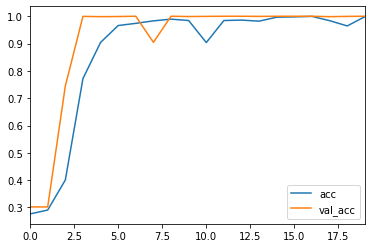

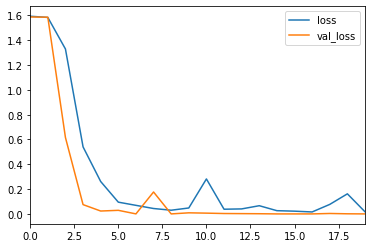

In [152]:
pd.DataFrame(loss.history)[['acc', 'val_acc']].plot() # nestabilumas loss kreiveje kaltinit arba learning rate arba pati data seta
                                                                # imant leanring_rate 0.02 matosi bangavima
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot() # loss isryskina paklaidas kurios yra treniruojamos


In [120]:
model.save('model5.h5')  